In [1]:
import random
import math
import time

# Data

In [2]:
cities = {
 1: (22, 22),
 2: (36, 26),
 3: (21, 45),
 4: (45, 35),
 5: (55, 20),
 6: (33, 34),
 7: (50, 50),
 8: (55, 45),
 9: (26, 59),
 10: (40, 66),
 11: (55, 65),
 12: (35, 51),
 13: (62, 35),
 14: (62, 57),
 15: (62, 24),
 16: (21, 36),
 17: (33, 44),
 18: (9, 56),
 19: (62, 48),
 20: (66, 14),
 21: (44, 13),
 22: (26, 13),
 23: (11, 28),
 24: (7, 43),
 25: (17, 64),
 26: (41, 46),
 27: (55, 34),
 28: (35, 16),
 29: (52, 26),
 30: (43, 26),
 31: (31, 76),
 32: (22, 53),
 33: (26, 29),
 34: (50, 40),
 35: (55, 50),
 36: (54, 10),
 37: (60, 15),
 38: (47, 66),
 39: (30, 60),
 40: (30, 50),
 41: (12, 17),
 42: (15, 14),
 43: (16, 19),
 44: (21, 48),
 45: (50, 30),
 46: (51, 42),
 47: (50, 15),
 48: (48, 21),
 49: (12, 38),
 50: (15, 56),
 51: (29, 39),
 52: (54, 38),
 53: (55, 57),
 54: (67, 41),
 55: (10, 70),
 56: (6, 25),
 57: (65, 27),
 58: (40, 60),
 59: (70, 64),
 60: (64, 4),
 61: (36, 6),
 62: (30, 20),
 63: (20, 30),
 64: (15, 5),
 65: (50, 70),
 66: (57, 72),
 67: (45, 42),
 68: (38, 33),
 69: (50, 4),
 70: (66, 8),
 71: (59, 5),
 72: (35, 60),
 73: (27, 24),
 74: (40, 20),
 75: (40, 37),
 76: (40, 40)}

# Defy

In [3]:
# Globalnie zdefiniowana funkcja distance
def distance(city1, city2):
    return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def ant_algorithm(cities, iterations=1000, alpha=1, beta=5, rho=0.5, Q=100, start_city=None, patience=200):
    num_ants = len(cities)
    
    # Inicjalizacja śladów feromonu
    pheromone = { (i, j): 1 for i in cities for j in cities if i != j }

    # Obliczanie widoczności, korzystając z globalnie zdefiniowanej funkcji distance
    visibility = { (i, j): 1 / distance(cities[i], cities[j]) for i in cities for j in cities if i != j }

    # Funkcja odpowiadająca za znalezienie trasy przez jedną mrówkę
    def ant_tour(start_city=start_city):
        tour = []
        visited = set()
        current = start_city if start_city is not None else random.choice(list(cities.keys()))
        visited.add(current)
        tour.append(current)

        for _ in range(len(cities) - 1):
            probabilities = [(j, pheromone[(current, j)] ** alpha * visibility[(current, j)] ** beta) for j in cities if j not in visited]
            total = sum(prob for _, prob in probabilities)
            if total == 0:
                total = 1e-10  # Avoid division by zero
            probabilities = [(city, prob / total) for city, prob in probabilities]
            next_city = random.choices([city for city, _ in probabilities], weights=[prob for _, prob in probabilities])[0]
            tour.append(next_city)
            visited.add(next_city)
            current = next_city

        # Dodaj powrót do miasta początkowego, zamykając trasę
        tour.append(tour[0])

        return tour

    best_tour_length = float('inf')
    best_tour = None
    no_improvement_count = 0  # Counter to track iterations without improvements

    # Główna pętla algorytmu
    for iteration in range(iterations):
        all_tours = [ant_tour() for _ in range(num_ants)]

        # Aktualizacja feromonu
        for i, j in pheromone:
            pheromone[(i, j)] *= (1 - rho)
        for tour in all_tours:
            length = sum(distance(cities[tour[i]], cities[tour[(i+1) % len(tour)]]) for i in range(len(tour)-1))
            for i in range(len(tour)-1):
                pheromone[(tour[i], tour[(i+1) % len(tour)])] += Q / length

            if length < best_tour_length:
                best_tour_length = length
                best_tour = tour
                no_improvement_count = 0  # Reset counter if improvement is found
            else:
                no_improvement_count += 1  # Increment if no improvement

        # Break if no improvement for 'patience' iterations
        if no_improvement_count >= patience:
            print(f"Stopping early after {iteration + 1} iterations due to no improvements.")
            break

    return best_tour, best_tour_length

# Kod

In [4]:
# Rozwiązanie dla zestawu miast i mierzenie czasu wykonania
start_time = time.time()  # Rozpoczęcie pomiaru czasu
tour, length = ant_algorithm(cities)
end_time = time.time()  # Zakończenie pomiaru czasu
execution_time = end_time - start_time

Stopping early after 7 iterations due to no improvements.


In [5]:
# Wyświetlenie wyników
print(f"Tour: {tour}, Tour Length: {length}")
print(f"Execution Time: {execution_time:.2f} seconds")

Tour: [3, 44, 32, 50, 18, 25, 55, 31, 9, 39, 72, 58, 10, 38, 65, 11, 66, 59, 14, 53, 35, 7, 8, 46, 34, 52, 27, 45, 29, 48, 47, 36, 69, 71, 60, 70, 20, 37, 5, 15, 57, 13, 54, 19, 67, 76, 75, 68, 6, 51, 17, 40, 12, 26, 4, 30, 74, 28, 62, 73, 1, 43, 41, 42, 64, 22, 61, 21, 2, 33, 63, 16, 49, 24, 23, 56, 3], Tour Length: 588.9472993298305
Execution Time: 1.15 seconds


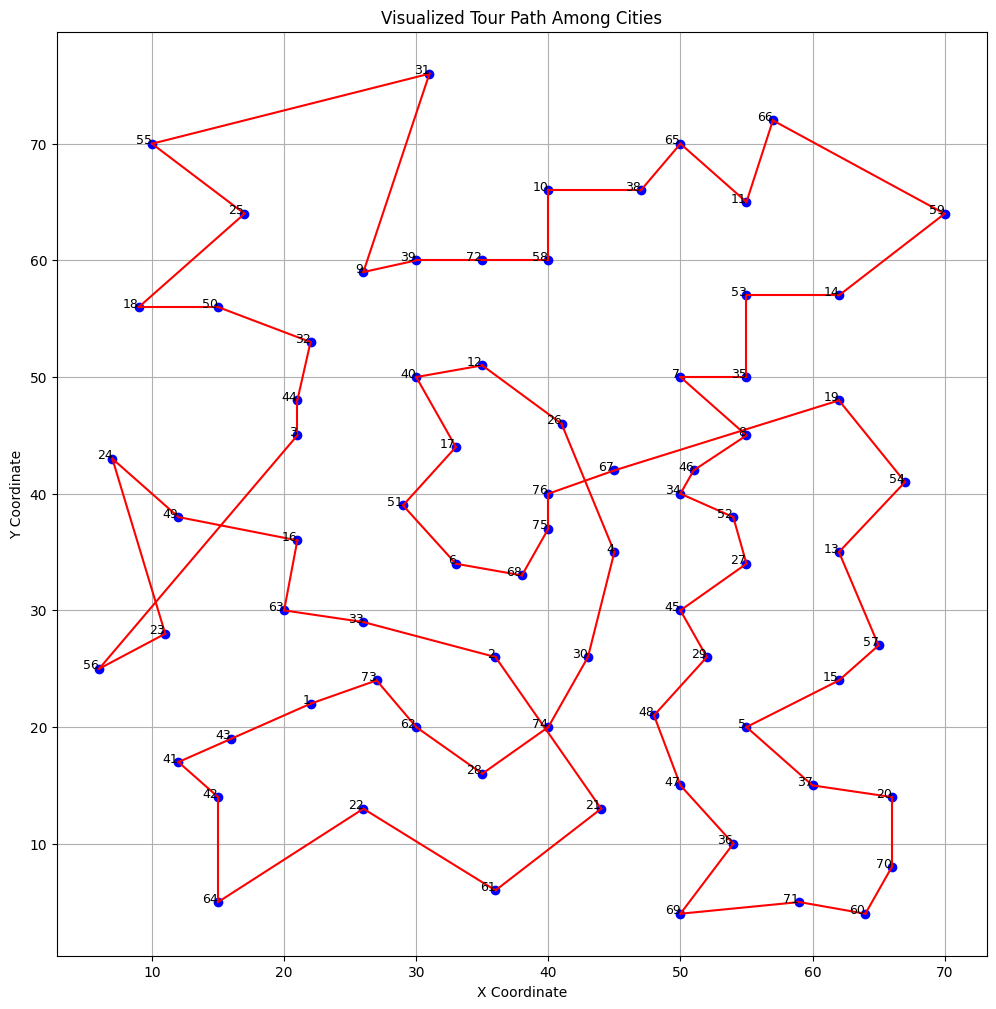

In [7]:
import matplotlib.pyplot as plt

# Define the tour across all clusters
tour = [3, 44, 32, 50, 18, 25, 55, 31, 9, 39, 72, 58, 10, 38, 65, 11, 66, 59, 14, 53, 35, 7, 8, 46, 34, 52, 27, 45, 29, 48, 47, 36, 69, 71, 60, 70, 20, 37, 5, 15, 57, 13, 54, 19, 67, 76, 75, 68, 6, 51, 17, 40, 12, 26, 4, 30, 74, 28, 62, 73, 1, 43, 41, 42, 64, 22, 61, 21, 2, 33, 63, 16, 49, 24, 23, 56, 3]
# Plotting the cities and the tour
fig, ax = plt.subplots(figsize=(12, 12))

# Extract coordinates for the tour
tour_coordinates = [cities[city] for city in tour]

# Plot each city as a point
for city_index, (x, y) in cities.items():
    ax.plot(x, y, 'bo')  # blue dot for each city
    ax.text(x, y, str(city_index), fontsize=9, ha='right')

# Draw lines between cities according to the tour
for i in range(len(tour_coordinates) - 1):
    x0, y0 = tour_coordinates[i]
    x1, y1 = tour_coordinates[i + 1]
    ax.plot([x0, x1], [y0, y1], 'r-')  # red line for the tour path

# Setting labels and grid
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_title('Visualized Tour Path Among Cities')
ax.grid(True)

# Show the completed plot
plt.show()